# --- Notebook : Modèle Linéaire - Cas de Tests ( Classification Binaire) ---

In [9]:
import ctypes
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [10]:
# === Charger la DLL Rust ===
lib = ctypes.CDLL("../target/release/mymodel.dll")

In [11]:
# === Fonctions communes ===
lib.create_linear_model.argtypes = [ctypes.c_size_t, ctypes.c_double, ctypes.c_size_t]
lib.create_linear_model.restype = ctypes.c_void_p

lib.train_linear_model.argtypes = [
    ctypes.c_void_p,
    ctypes.POINTER(ctypes.c_double),
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_size_t, ctypes.c_size_t
]
lib.predict_linear_model.argtypes = [ctypes.c_void_p, ctypes.POINTER(ctypes.c_double), ctypes.c_size_t]
lib.predict_linear_model.restype = ctypes.c_double


In [12]:
# === Fonctions classification binaire (tanh) ===
lib.train_linear_model_classification.argtypes = lib.train_linear_model.argtypes
lib.predict_linear_model_classification.argtypes = lib.predict_linear_model.argtypes
lib.train_linear_model_classification.restype = None
lib.predict_linear_model_classification.restype = ctypes.c_double

In [13]:
def test_classification_tanh(X, Y, name):
    print(f"\n--- {name} ---")
    model = lib.create_linear_model(X.shape[1], 0.1, 1000)
    X_flat = X.flatten().astype(np.float64)
    Y_float = Y.astype(np.float64)

    lib.train_linear_model_classification(
        model,
        X_flat.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        Y_float.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0], X.shape[1]
    )

    predictions = []
    for i in range(len(X)):
        x = X[i].astype(np.float64)
        pred = lib.predict_linear_model_classification(
            model, x.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), len(x)
        )
        label = 1 if pred >= 0 else -1
        predictions.append(label)
        print(f"Exemple {i} : Prédit = {label}, Vrai = {Y[i]}, Valeur tanh = {pred:.3f}")

    predictions = np.array(predictions)

    # Visualisation 2D si possible
    if X.shape[1] == 2:
        plt.figure()
        plt.title(name)
        for cls in np.unique(Y):
            plt.scatter(X[Y == cls, 0], X[Y == cls, 1], label=f"Classe {int(cls)}")
        for i, pt in enumerate(X):
            plt.text(pt[0], pt[1], str(predictions[i]), fontsize=12, color='black')
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.legend()
        plt.grid(True)
        plt.show()


# Cas 1 : Linear Simple


--- Classification - Linear Simple ---
Exemple 0 : Prédit = 1, Vrai = 1, Valeur tanh = 0.938
Exemple 1 : Prédit = -1, Vrai = 1, Valeur tanh = -0.992
Exemple 2 : Prédit = 1, Vrai = 1, Valeur tanh = 0.942
Exemple 3 : Prédit = -1, Vrai = -1, Valeur tanh = -0.929
Exemple 4 : Prédit = -1, Vrai = -1, Valeur tanh = -0.927
Exemple 5 : Prédit = -1, Vrai = -1, Valeur tanh = -0.924


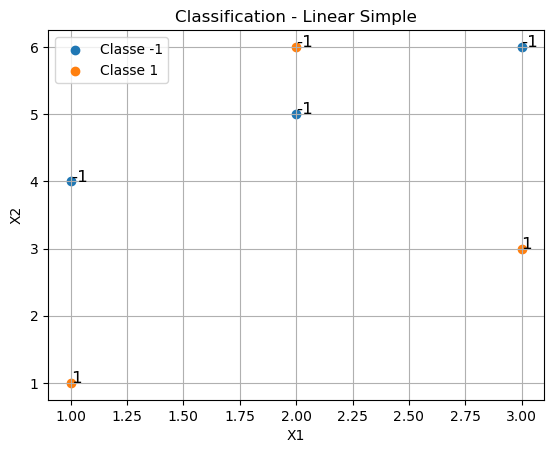

In [15]:
# === Cas 1 : Linear Simple ===
X_cls1 = np.array([
    [1, 1], [2, 6], [3, 3],
    [1, 4], [2, 5], [3, 6]
])
Y_cls1 = np.array([1, 1, 1, -1, -1, -1])
test_classification_tanh(X_cls1, Y_cls1, "Classification - Linear Simple")

# Linear Multiple


--- Classification - Linear Multiple ---
Exemple 0 : Prédit = 1, Vrai = 1, Valeur tanh = 0.967
Exemple 1 : Prédit = 1, Vrai = 1, Valeur tanh = 0.983
Exemple 2 : Prédit = 1, Vrai = 1, Valeur tanh = 0.991
Exemple 3 : Prédit = 1, Vrai = 1, Valeur tanh = 0.995
Exemple 4 : Prédit = 1, Vrai = 1, Valeur tanh = 0.998
Exemple 5 : Prédit = 1, Vrai = 1, Valeur tanh = 0.999
Exemple 6 : Prédit = -1, Vrai = -1, Valeur tanh = -1.000
Exemple 7 : Prédit = -1, Vrai = -1, Valeur tanh = -0.999
Exemple 8 : Prédit = -1, Vrai = -1, Valeur tanh = -0.998
Exemple 9 : Prédit = -1, Vrai = -1, Valeur tanh = -0.997
Exemple 10 : Prédit = -1, Vrai = -1, Valeur tanh = -0.993
Exemple 11 : Prédit = -1, Vrai = -1, Valeur tanh = -0.987


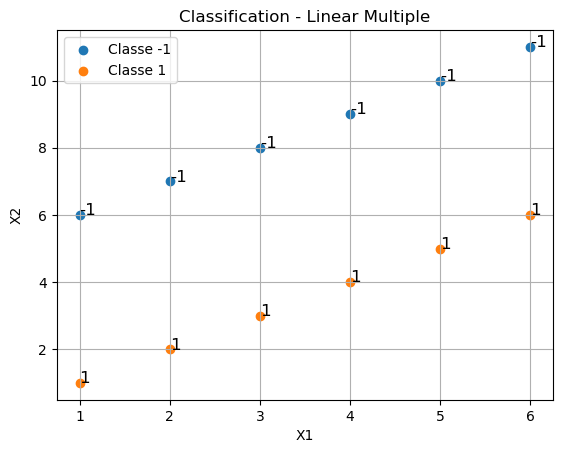

In [7]:
# === Cas 2 : Linear Multiple ===
X_cls2 = np.array([
    [1, 1], [2, 2], [3, 3],
    [4, 4], [5, 5], [6, 6],
    [1, 6], [2, 7], [3, 8],
    [4, 9], [5, 10], [6, 11]
])
Y_cls2 = np.array([1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1])
test_classification_tanh(X_cls2, Y_cls2, "Classification - Linear Multiple")

# Cas 3 : XOR


--- Classification - XOR ---
Exemple 0 : Prédit = 1, Vrai = -1, Valeur tanh = 0.109
Exemple 1 : Prédit = 1, Vrai = 1, Valeur tanh = 0.000
Exemple 2 : Prédit = -1, Vrai = 1, Valeur tanh = -0.109
Exemple 3 : Prédit = -1, Vrai = -1, Valeur tanh = -0.216


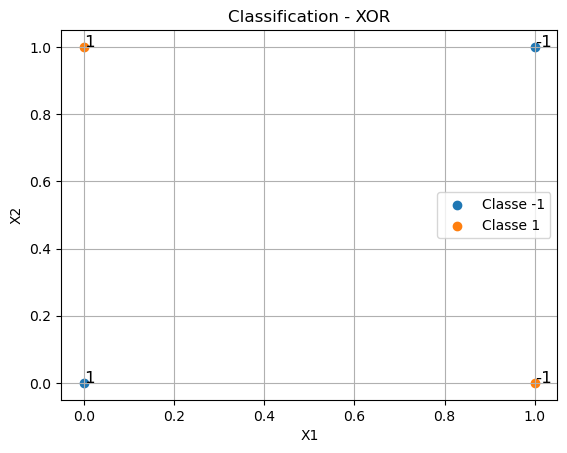

In [8]:
# === Cas 3 : XOR (Non-linéaire) ===
X_xor = np.array([
    [0, 0], [0, 1], [1, 0], [1, 1]
])
Y_xor = np.array([-1, 1, 1, -1])
test_classification_tanh(X_xor, Y_xor, "Classification - XOR")

# Cas 4 : Cross


--- Classification - Cross ---
Exemple 0 : Prédit = 1, Vrai = 1, Valeur tanh = 1.000
Exemple 1 : Prédit = 1, Vrai = 1, Valeur tanh = 0.998
Exemple 2 : Prédit = 1, Vrai = 1, Valeur tanh = 0.837
Exemple 3 : Prédit = 1, Vrai = 1, Valeur tanh = 1.000
Exemple 4 : Prédit = 1, Vrai = 1, Valeur tanh = 0.998
Exemple 5 : Prédit = 1, Vrai = 1, Valeur tanh = 0.835
Exemple 6 : Prédit = 1, Vrai = -1, Valeur tanh = 0.998
Exemple 7 : Prédit = -1, Vrai = -1, Valeur tanh = -0.821
Exemple 8 : Prédit = -1, Vrai = -1, Valeur tanh = -1.000


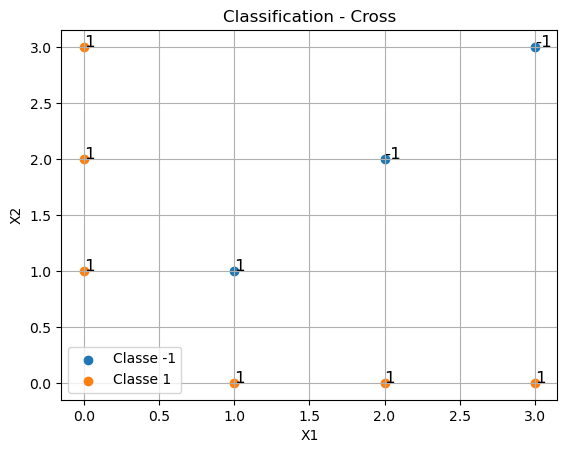

In [ ]:
# === Cas 4 : Cross  ===
X_cross = np.array([
    [1, 0], [2, 0], [3, 0],
    [0, 1], [0, 2], [0, 3],
    [1, 1], [2, 2], [3, 3]
])
Y_cross = np.array([1, 1, 1, 1, 1, 1, -1, -1, -1])
test_classification_tanh(X_cross, Y_cross, "Classification - Cross")


--- Classification - Cross ---
Exemple 0 : Prédit = -1, Vrai = 1, Valeur tanh = -0.659
Exemple 1 : Prédit = -1, Vrai = 1, Valeur tanh = -0.689
Exemple 2 : Prédit = -1, Vrai = 1, Valeur tanh = -0.664
Exemple 3 : Prédit = -1, Vrai = 1, Valeur tanh = -0.706
Exemple 4 : Prédit = -1, Vrai = 1, Valeur tanh = -0.752
Exemple 5 : Prédit = -1, Vrai = 1, Valeur tanh = -0.735
Exemple 6 : Prédit = -1, Vrai = 1, Valeur tanh = -0.714
Exemple 7 : Prédit = -1, Vrai = 1, Valeur tanh = -0.728
Exemple 8 : Prédit = -1, Vrai = 1, Valeur tanh = -0.679
Exemple 9 : Prédit = -1, Vrai = 1, Valeur tanh = -0.741
Exemple 10 : Prédit = -1, Vrai = 1, Valeur tanh = -0.839
Exemple 11 : Prédit = -1, Vrai = 1, Valeur tanh = -0.714
Exemple 12 : Prédit = -1, Vrai = 1, Valeur tanh = -0.644
Exemple 13 : Prédit = -1, Vrai = 1, Valeur tanh = -0.749
Exemple 14 : Prédit = -1, Vrai = 1, Valeur tanh = -0.664
Exemple 15 : Prédit = -1, Vrai = 1, Valeur tanh = -0.740
Exemple 16 : Prédit = -1, Vrai = 1, Valeur tanh = -0.795
Exemple 1

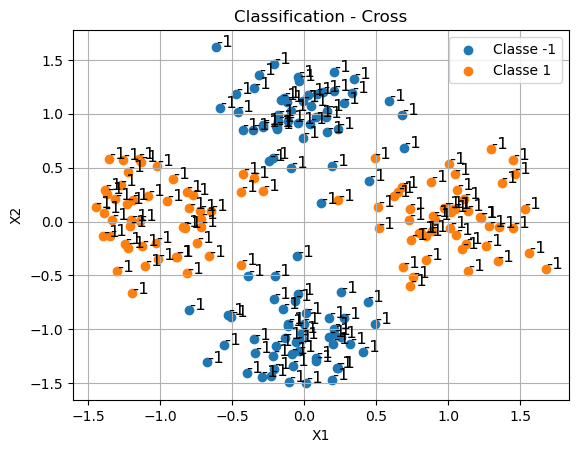

In [ ]:
# === Test  CROSS === (bcc de données)
np.random.seed(0)
X_cross = np.concatenate([
    np.random.randn(50, 2) * 0.3 + [1, 0],
    np.random.randn(50, 2) * 0.3 + [-1, 0],
    np.random.randn(50, 2) * 0.3 + [0, 1],
    np.random.randn(50, 2) * 0.3 + [0, -1],
])
Y_cross = np.array([1]*100 + [-1]*100)
test_classification_tanh(X_cross, Y_cross, "Classification - Cross")

# Cas 5 : MultiLinear


--- Classification - MultiLinear - Classe 0 vs autres ---
Exemple 0 : Prédit = 1, Vrai = 1, Valeur tanh = 1.000
Exemple 1 : Prédit = -1, Vrai = -1, Valeur tanh = -1.000
Exemple 2 : Prédit = -1, Vrai = -1, Valeur tanh = -0.994
Exemple 3 : Prédit = 1, Vrai = 1, Valeur tanh = 1.000
Exemple 4 : Prédit = -1, Vrai = -1, Valeur tanh = -1.000
Exemple 5 : Prédit = 1, Vrai = 1, Valeur tanh = 1.000
Exemple 6 : Prédit = 1, Vrai = 1, Valeur tanh = 1.000
Exemple 7 : Prédit = -1, Vrai = -1, Valeur tanh = -1.000
Exemple 8 : Prédit = 1, Vrai = 1, Valeur tanh = 1.000
Exemple 9 : Prédit = -1, Vrai = -1, Valeur tanh = -1.000
Exemple 10 : Prédit = -1, Vrai = -1, Valeur tanh = -1.000
Exemple 11 : Prédit = -1, Vrai = -1, Valeur tanh = -1.000
Exemple 12 : Prédit = -1, Vrai = -1, Valeur tanh = -1.000
Exemple 13 : Prédit = -1, Vrai = -1, Valeur tanh = -1.000
Exemple 14 : Prédit = -1, Vrai = -1, Valeur tanh = -1.000
Exemple 15 : Prédit = -1, Vrai = -1, Valeur tanh = -1.000
Exemple 16 : Prédit = -1, Vrai = -1, V

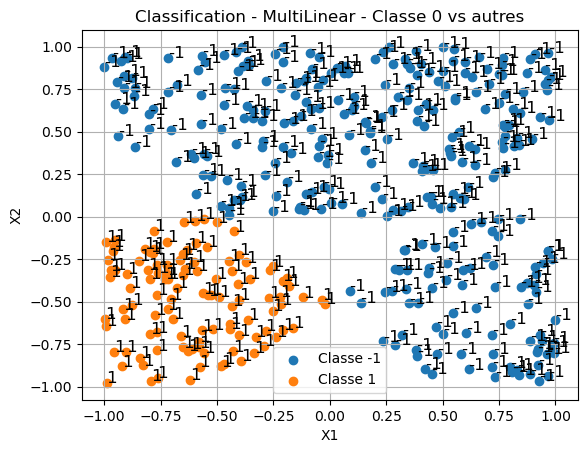

In [ ]:
# === Test classificqtion binaire (3 classes) ===
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([
    [1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
    [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
    [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
    [0, 0, 0] for p in X
])

X = X[~np.all(Y == [0, 0, 0], axis=1)]
Y = Y[~np.all(Y == [0, 0, 0], axis=1)]
labels = np.argmax(Y, axis=1)  # convert one-hot to class index: 0, 1, 2


Y_binary = np.where(labels == 0, 1, -1)
test_classification_tanh(X, Y_binary, "Classification - MultiLinear - Classe 0 vs autres")

# Cas 6 : Multi Cross


--- Classification tanh - Classe 0 vs autres ---
Exemple 0 : Prédit = -1, Vrai = -1, Valeur tanh = -0.641
Exemple 1 : Prédit = -1, Vrai = 1, Valeur tanh = -0.399
Exemple 2 : Prédit = -1, Vrai = -1, Valeur tanh = -0.586
Exemple 3 : Prédit = -1, Vrai = 1, Valeur tanh = -0.605
Exemple 4 : Prédit = -1, Vrai = 1, Valeur tanh = -0.619
Exemple 5 : Prédit = -1, Vrai = -1, Valeur tanh = -0.523
Exemple 6 : Prédit = -1, Vrai = -1, Valeur tanh = -0.477
Exemple 7 : Prédit = -1, Vrai = 1, Valeur tanh = -0.291
Exemple 8 : Prédit = -1, Vrai = -1, Valeur tanh = -0.858
Exemple 9 : Prédit = -1, Vrai = -1, Valeur tanh = -0.591
Exemple 10 : Prédit = -1, Vrai = -1, Valeur tanh = -0.608
Exemple 11 : Prédit = -1, Vrai = -1, Valeur tanh = -0.800
Exemple 12 : Prédit = -1, Vrai = -1, Valeur tanh = -0.600
Exemple 13 : Prédit = -1, Vrai = -1, Valeur tanh = -0.660
Exemple 14 : Prédit = -1, Vrai = -1, Valeur tanh = -0.728
Exemple 15 : Prédit = -1, Vrai = -1, Valeur tanh = -0.749
Exemple 16 : Prédit = -1, Vrai = -1,

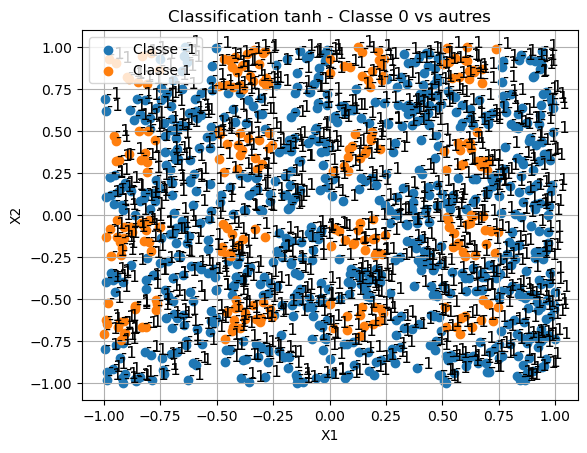

In [12]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([
    [1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else 
    [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else 
    [0, 0, 1] for p in X])

labels = np.argmax(Y, axis=1)
Y_binary_0 = np.where(labels == 0, 1, -1)
test_classification_tanh(X, Y_binary_0, "Classification tanh - Classe 0 vs autres")
